<a href="https://colab.research.google.com/github/a-drew/banan.ai-mp1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Starter Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import *
import numpy as np
import logging
import scipy.sparse as sp

2. Pre-Analysis

['business', 'entertainment', 'politics', 'sport', 'tech']
[510, 386, 417, 511, 401]


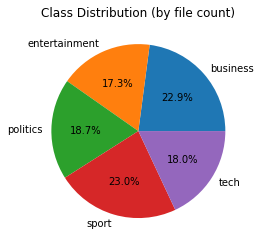

In [2]:
categories = sorted([file for file in os.listdir('data/BBC') if file != 'README.TXT'])
print(categories)
counts = [len([name for name in os.listdir('data/BBC/' + category)]) for category in categories]
print(counts)

plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title('Class Distribution (by file count)')

plt.savefig('output/BBC-distribution.pdf')
plt.show()

3. Load the Dataset

In [3]:
dataset = skl.datasets.load_files('data/BBC', encoding="latin1")

print(dataset.keys())
print(dataset.target_names)
print(dataset.target[0:5])
print(dataset.filenames[0:5])
print(dataset.data[0:5])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
['business', 'entertainment', 'politics', 'sport', 'tech']
[0 4 2 3 2]
['data/BBC\\business\\385.txt' 'data/BBC\\tech\\160.txt'
 'data/BBC\\politics\\090.txt' 'data/BBC\\sport\\074.txt'
 'data/BBC\\politics\\399.txt']
['Tate & Lyle boss bags top award\r\n\r\nTate & Lyle\'s chief executive has been named European Businessman of the Year by a leading business magazine.\r\n\r\nIain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate\'s shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.\r\n\r\n"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes sa

4. Preprocess

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
x_word_counts = vec.fit_transform(dataset.data)
#print(x_word_counts)
#print(vec.get_feature_names_out())

pd.DataFrame(data=x_word_counts.toarray(),columns=vec.get_feature_names_out())

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5. Split Training / Test Data

In [5]:
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(x_word_counts, dataset.target, train_size=0.8, random_state=None)

print(x_train)
print(y_train)

  (0, 12684)	1
  (0, 18726)	9
  (0, 26462)	26
  (0, 4980)	1
  (0, 28521)	4
  (0, 26718)	1
  (0, 27901)	1
  (0, 11102)	16
  (0, 18837)	1
  (0, 26730)	23
  (0, 12452)	2
  (0, 17855)	5
  (0, 14557)	4
  (0, 12726)	1
  (0, 26531)	5
  (0, 2429)	10
  (0, 14571)	1
  (0, 23041)	7
  (0, 26792)	2
  (0, 2994)	4
  (0, 13801)	6
  (0, 13073)	2
  (0, 2395)	1
  (0, 467)	1
  (0, 17372)	1
  :	:
  (1779, 18059)	1
  (1779, 4831)	2
  (1779, 2111)	2
  (1779, 4830)	2
  (1779, 5337)	1
  (1779, 3369)	2
  (1779, 16391)	3
  (1779, 19723)	1
  (1779, 2112)	3
  (1779, 16392)	1
  (1779, 2316)	2
  (1779, 1403)	1
  (1779, 4883)	1
  (1779, 28301)	1
  (1779, 6512)	1
  (1779, 3370)	1
  (1779, 10515)	1
  (1779, 18897)	1
  (1779, 10162)	1
  (1779, 5732)	1
  (1779, 10313)	1
  (1779, 17563)	1
  (1779, 4393)	1
  (1779, 7597)	1
  (1779, 25374)	1
[4 4 0 ... 1 1 0]


6. Train Naive Bayes Classifier

In [6]:
nb = skl.naive_bayes.MultinomialNB()
#Train the model using the training sets
nb.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = nb.predict(x_test)

7. Performance Metrics
 - [x] a clear separator (a sequence of hyphens or stars) and string clearly describing the model (e.g. “Multi- nomialNB default values, try 1”)
 - [x] the confusion matrix (you can use confusion matrix)
 - [x] the precision, recall, and F1-measure for each class (you can use classification report)
 - [x] the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy score and f1 score)
 - [x] the prior probability of each class
 - [x] the size of the vocabulary (i.e. the number of different words1)
 - [x] the number of word-tokens in each class (i.e. the number of words in total2)
 - [x] the number of word-tokens in the entire corpus
 - [x] the number and percentage of words with a frequency of zero in each class
 - [x] the number and percentage of words with a frequency of one in the entire corpus
 - [x] your 2 favorite words (that are present in the vocabulary) and their log-prob

In [7]:
#counts_train = [np.count_nonzero(y_train == k) for k, v in enumerate(dataset.target_names)]
priors = { cat: np.count_nonzero(y_train == i)/len(y_train) for i, cat in enumerate(dataset.target_names) }

In [8]:
if os.path.exists('output/bbc-performance.txt'):
    os.remove('output/bbc-performance.txt')

logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger()
logger.addHandler(logging.FileHandler('output/bbc-performance.txt', 'w'))

In [9]:
nb_runs = 1 # try counter

def performance_report(test, pred):
    print = logger.info
    
    global nb_runs
    print('===================')
    print(' Naive Bayes Try ' + str(nb_runs))
    print('===================')
    nb_runs+=1

    print('\n(b) confusion_matrix:')
    print(skl.metrics.confusion_matrix(test, pred))
    print("\n(c/d) classification_report: ")
    print(skl.metrics.classification_report(test, pred, target_names=dataset.target_names))

    #print("\n(d) accuracy_score: ")
    #print(metrics.accuracy_score(test, pred))
    #print("\n(d) f1_score (macro avg): ")
    #print(metrics.f1_score(test, pred, average='macro'))
    #print("\n(d) f1_score (weighted avg): ")
    #print(metrics.f1_score(test, pred, average='weighted'))

    print("\n(e) prior probability of each class: ")
    print(priors)
    print("\n(f) vocabulary size: " + str(len(vec.get_feature_names_out())))
    #LEFT TODO:
    print("\n(g) word-tokens in each class: ")
    print("\n(h) word-tokens in the entire corpus: ")# + np.add.reduce(x_word_counts.toarray()))
    print("\n(i) the number and percentage of words with a frequency of zero in each class: ")
    print("\n(j) the number and percentage of words with a frequency of one in the entire corpus: ")
    print("\n(k) your 2 favorite words (that are present in the vocabulary) and their log-prob: ")
    # something with nb.feature_log_prob_ ? find word index, look up log-prob in feature_log_prob_, not sure what to do about the 5 diff rows

    print("\n")

performance_report(y_test, y_pred)

inverted_vocab = dict(zip(vec.vocabulary_.values(), vec.vocabulary_.keys()))

# word frequency for test data
word_freq_dicts = [{}, {}, {}, {}, {}] # per category
word_freq_sums = [0, 0, 0, 0, 0]
ctr = 0

for x in x_test:
    category = y_test[ctr]
    current_dict = word_freq_dicts[category]
    current_sum = word_freq_sums[category]
    x_test_snippet = dict(zip(x[0].indices, x[0].data))

    for i in x_test_snippet:
        occurance = x_test_snippet[i]
        word = inverted_vocab[i]
        current_dict[word] = occurance
        current_sum += occurance
        word_freq_sums[category] = current_sum

    ctr += 1

for i in range(len(word_freq_dicts)):
    #print('word_freq_dicts[' + str(i) + '] ( ' + dataset.target_names[i] + ')', word_freq_dicts[i])
    print('word_freq_dicts[' + str(i) + '] ( ' + dataset.target_names[i] + ') word token count --> ', word_freq_sums[i])
    print('\n\n-------------------------------------------------\n\n')

# word frequency for test + training data

word_freq_map_all = {}
x_merged_sets = sp.vstack((x_test, x_train))

total_corpus_sum = 0

for x in x_merged_sets:
    x_test_snippet = dict(zip(x[0].indices, x[0].data))
    for i in x_test_snippet:
        occurance = x_test_snippet[i]
        word = inverted_vocab[i]
        word_freq_map_all[word] = occurance
        total_corpus_sum += occurance

print('running_sum of word tokens in entire corpus', total_corpus_sum)

# frequency of zero per category
i = 0
total_vocab_words = len(vec.vocabulary_.keys())

for current_dict in word_freq_dicts:
    current_category = dataset.target_names[i]
    print('current_category', current_category)
    category_words_set = set(current_dict.keys())
    vocab_words_set = set(vec.vocabulary_.keys())
    set_diff_result = vocab_words_set.difference(category_words_set)
    total_zero_freq_words = len(set_diff_result)
    print('total 0 frequency words:', total_zero_freq_words)
    print('corresponding percentage: ' + str(100 * (total_zero_freq_words/total_vocab_words)) + '%')
    i += 1

# frequency of one for entire corpus

freq_one_sum = 0
for entry in word_freq_map_all:
    if word_freq_map_all[entry] == 1:
        freq_one_sum += 1

print('total one frequency words: ' + str(freq_one_sum))
print('percentage of one frequency words: ' + str(100 * freq_one_sum/total_corpus_sum) + '%')
#print('word_freq_map_all', word_freq_map_all)

# 2 fav words: the, abdullah
# compute log frequency
# formula: (N_yi + alpha)/(N_y + alpha * n)
# where
# N_yi --> # occurance of "favorite" word
# N_y --> total amount of words
# alpha --> 1, default value as per sklearn
# n --> size of vocabulary
print('\n\nFAVORITE WORDS: the and abdullah')
print('case: the')
N_yi = word_freq_map_all['the']
N_y = total_corpus_sum
alpha = 1
n = len(word_freq_map_all)
log_prob_hefty = (N_yi + alpha)/(N_y + alpha * n)
print('log_prob_hefty: ' + str(log_prob_hefty))

print('case: abdullah')
N_yi = word_freq_map_all['abdullah']
log_prob_abdullah = (N_yi + alpha)/(N_y + alpha * n)
print('log_prob_abdullah: ' + str(log_prob_abdullah))


 Naive Bayes Try 1

(b) confusion_matrix:
[[101   0   4   0   3]
 [  0  78   1   0   1]
 [  0   0  78   0   0]
 [  0   0   0 106   0]
 [  0   0   0   0  73]]

(c/d) classification_report: 
               precision    recall  f1-score   support

     business       1.00      0.94      0.97       108
entertainment       1.00      0.97      0.99        80
     politics       0.94      1.00      0.97        78
        sport       1.00      1.00      1.00       106
         tech       0.95      1.00      0.97        73

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445


(e) prior probability of each class: 
{'business': 0.2258426966292135, 'entertainment': 0.17191011235955056, 'politics': 0.1904494382022472, 'sport': 0.22752808988764045, 'tech': 0.1842696629213483}

(f) vocabulary size: 29421

(g) word-tokens in each class: 

(h) word-tokens in the entire corpus: 

(i) the num

word_freq_dicts[0] ( business) word token count -->  34624


-------------------------------------------------


word_freq_dicts[1] ( entertainment) word token count -->  25613


-------------------------------------------------


word_freq_dicts[2] ( politics) word token count -->  35046


-------------------------------------------------


word_freq_dicts[3] ( sport) word token count -->  33121


-------------------------------------------------


word_freq_dicts[4] ( tech) word token count -->  35299


-------------------------------------------------


running_sum of word tokens in entire corpus 836357
current_category business
total 0 frequency words: 24223
corresponding percentage: 82.33234764284015%
current_category entertainment
total 0 frequency words: 24436
corresponding percentage: 83.05632031542096%
current_category politics
total 0 frequency words: 24345
corresponding percentage: 82.74701743652493%
current_category sport
total 0 frequency words: 24449
corresponding percent

8. Naive Bayes, Try 2

In [10]:
nb2 = skl.naive_bayes.MultinomialNB()
nb2.fit(x_train, y_train)

performance_report(y_test, nb2.predict(x_test))

 Naive Bayes Try 2

(b) confusion_matrix:
[[101   0   4   0   3]
 [  0  78   1   0   1]
 [  0   0  78   0   0]
 [  0   0   0 106   0]
 [  0   0   0   0  73]]

(c/d) classification_report: 
               precision    recall  f1-score   support

     business       1.00      0.94      0.97       108
entertainment       1.00      0.97      0.99        80
     politics       0.94      1.00      0.97        78
        sport       1.00      1.00      1.00       106
         tech       0.95      1.00      0.97        73

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445


(e) prior probability of each class: 
{'business': 0.2258426966292135, 'entertainment': 0.17191011235955056, 'politics': 0.1904494382022472, 'sport': 0.22752808988764045, 'tech': 0.1842696629213483}

(f) vocabulary size: 29421

(g) word-tokens in each class: 

(h) word-tokens in the entire corpus: 

(i) the num

9. Naive Bayes, Try 3

In [11]:
nb3 = skl.naive_bayes.MultinomialNB(alpha=0.0001)
nb3.fit(x_train, y_train)

performance_report(y_test, nb3.predict(x_test))

 Naive Bayes Try 3

(b) confusion_matrix:
[[103   0   2   0   3]
 [  0  80   0   0   0]
 [  1   0  77   0   0]
 [  0   0   1 105   0]
 [  0   0   0   0  73]]

(c/d) classification_report: 
               precision    recall  f1-score   support

     business       0.99      0.95      0.97       108
entertainment       1.00      1.00      1.00        80
     politics       0.96      0.99      0.97        78
        sport       1.00      0.99      1.00       106
         tech       0.96      1.00      0.98        73

     accuracy                           0.98       445
    macro avg       0.98      0.99      0.98       445
 weighted avg       0.98      0.98      0.98       445


(e) prior probability of each class: 
{'business': 0.2258426966292135, 'entertainment': 0.17191011235955056, 'politics': 0.1904494382022472, 'sport': 0.22752808988764045, 'tech': 0.1842696629213483}

(f) vocabulary size: 29421

(g) word-tokens in each class: 

(h) word-tokens in the entire corpus: 

(i) the num

10. Naive Bayes, Try 4

In [12]:
nb4 = skl.naive_bayes.MultinomialNB(alpha=0.9)
nb4.fit(x_train, y_train)

performance_report(y_test, nb4.predict(x_test))

nb_runs = 1 # reset try count

 Naive Bayes Try 4

(b) confusion_matrix:
[[101   0   4   0   3]
 [  0  79   0   0   1]
 [  0   0  78   0   0]
 [  0   0   0 106   0]
 [  0   0   0   0  73]]

(c/d) classification_report: 
               precision    recall  f1-score   support

     business       1.00      0.94      0.97       108
entertainment       1.00      0.99      0.99        80
     politics       0.95      1.00      0.97        78
        sport       1.00      1.00      1.00       106
         tech       0.95      1.00      0.97        73

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445


(e) prior probability of each class: 
{'business': 0.2258426966292135, 'entertainment': 0.17191011235955056, 'politics': 0.1904494382022472, 'sport': 0.22752808988764045, 'tech': 0.1842696629213483}

(f) vocabulary size: 29421

(g) word-tokens in each class: 

(h) word-tokens in the entire corpus: 

(i) the num

11. TODO: Write BBC-discussions.txt